In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Matplotlib library to plot the charts
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns # Library for the statistic data vizualisation

# Classifier Libraries
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC # Scikit-learn library: SVM
from sklearn.linear_model import LogisticRegression # Scikit-learn library: LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Scikit-learn library: RandomForest

## Dataset

In [2]:
# Import data
df = pd.DataFrame(pd.read_csv("creditcard.csv"))
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
# metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

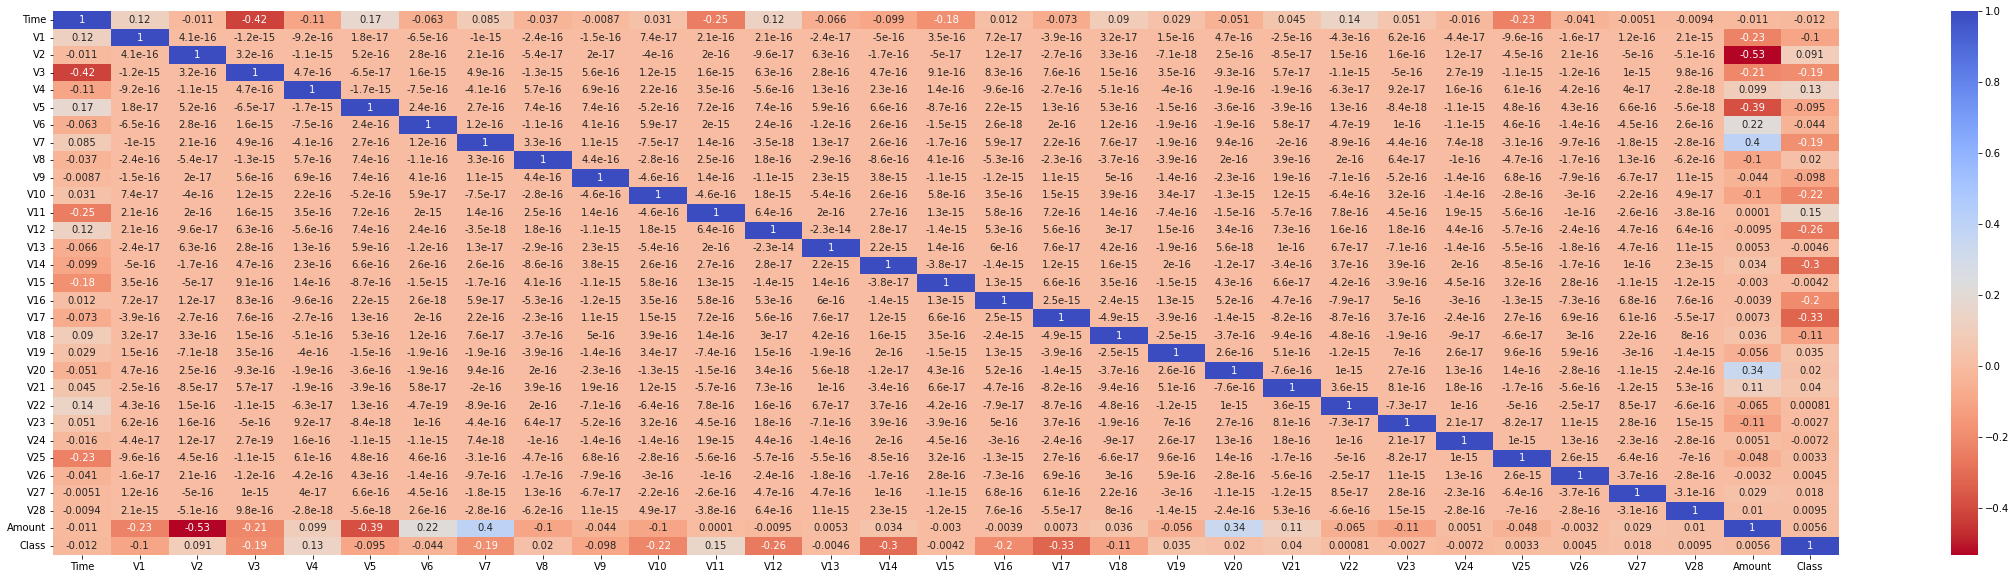

In [16]:
# Calculation of the correlation coefficients in pairs, with the default method: Pearson, Standard Correlation Coefficient
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm_r")
plt.show()

As we can notice, most of the features are **not correlated** with each other. This shows the fact that a **PCA** was previously performed on the data.

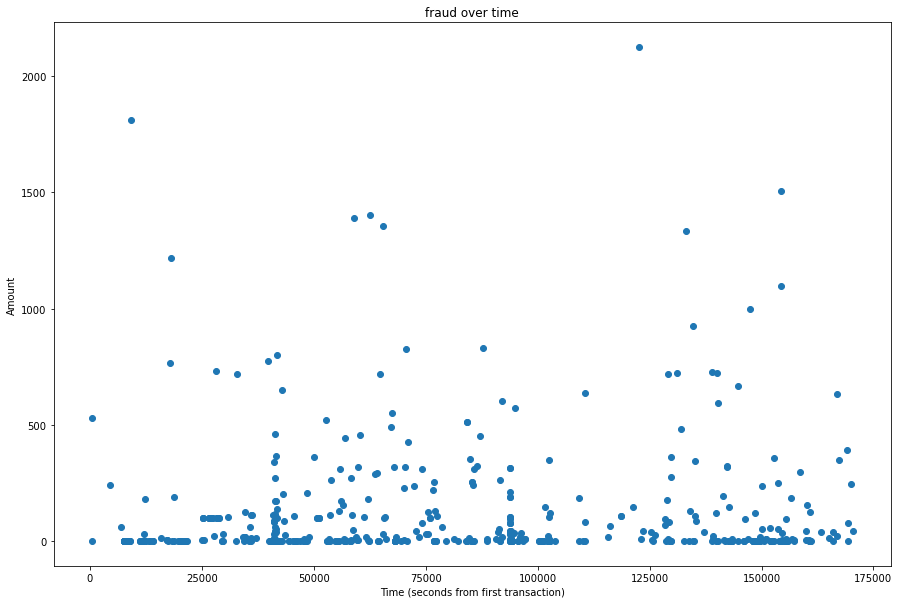

In [5]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('fraud over time')
plt.xlabel('Time (seconds from first transaction)')
plt.ylabel('Amount')
plt.show()

## Preparing for Training

In [17]:
# split data in two groups : a train dataset and a test dataset
df_train, df_test = train_test_split(df, test_size=0.3)
X_train = np.asarray(df_train.drop(['Time', 'Class'],axis=1)) # We drop the features Time (useless), and the Class (label)
y_train = np.asarray(df_train['Class']) # We create our label
X_test = np.asarray(df_test.drop(['Time', 'Class'],axis=1))
y_test = np.asarray(df_test['Class'])

### SVM model classifier

In [ ]:
clf_SVM = svm.SVC(kernel='linear') # We set a SVM classifier (the default SVM Classifier has Kernel = RBF)
clf_SVM.fit(X_train, y_train) # Then we train our model, with our data train.
y_pred_SVM = clf_SVM.predict(X_test) # Then we predict our data test.
cm_SVM = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM) # And finally we plot a confusion matrix
plt.show()

### Logistic Regression model classifier

C:\Users\sinas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


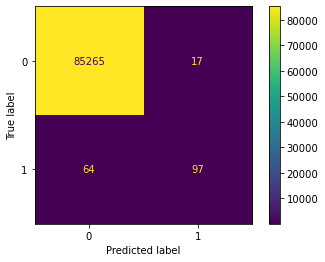

In [21]:
clf_LR = LogisticRegression(random_state=0)
clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)
len(y_pred_LR[y_pred_LR == 1])
cm_LR = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
plt.show()

### Random Forest model classifier

In [ ]:
clf_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
cm_RF= ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)
plt.show()

## Unbalanced dataset

In [10]:
big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(big_fraud) + ' frauds over ' + str(df_fraud.shape[0]) + ' frauds' +  ' with the amount bigger than 1000')

num_fraud = len(df[df.Class == 1])
num_non_fraud = len(df[df.Class == 0])
print('There are only '+ str(num_fraud) + ' frauds in the original dataset, and there are ' + str(num_non_fraud) +' non-frauds in the dataset.')

There are only 9 frauds over 492 frauds with the amount bigger than 1000
There are only 492 frauds in the original dataset, and there are 284315 non-frauds in the dataset.


This dataset is **unbalanced** which means using the data as it is might result in **unwanted behaviour from a supervised classifier**. To make it easy to understand if a classifier were to train with this dataset trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud